In [42]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [7]:
dataset = pd.read_csv('chp.csv')

In [8]:
dataset.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
dataset.shape

(20640, 10)

In [10]:
# Types of each columns
dataset.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [11]:
# Number of null values in each columns 
dataset.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [12]:
# null values in each columns in percent
dataset.isnull().mean() * 100

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

In [13]:
# Filling missing values of total_bedrooms column with its mean
dataset["total_bedrooms"] = dataset["total_bedrooms"].fillna(value=dataset["total_bedrooms"].mean())

In [14]:
# Checking whether we have any null value, as you see there is no null value 
dataset.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

Data Visuvalization: in this section we visualize data and interpret each figure

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

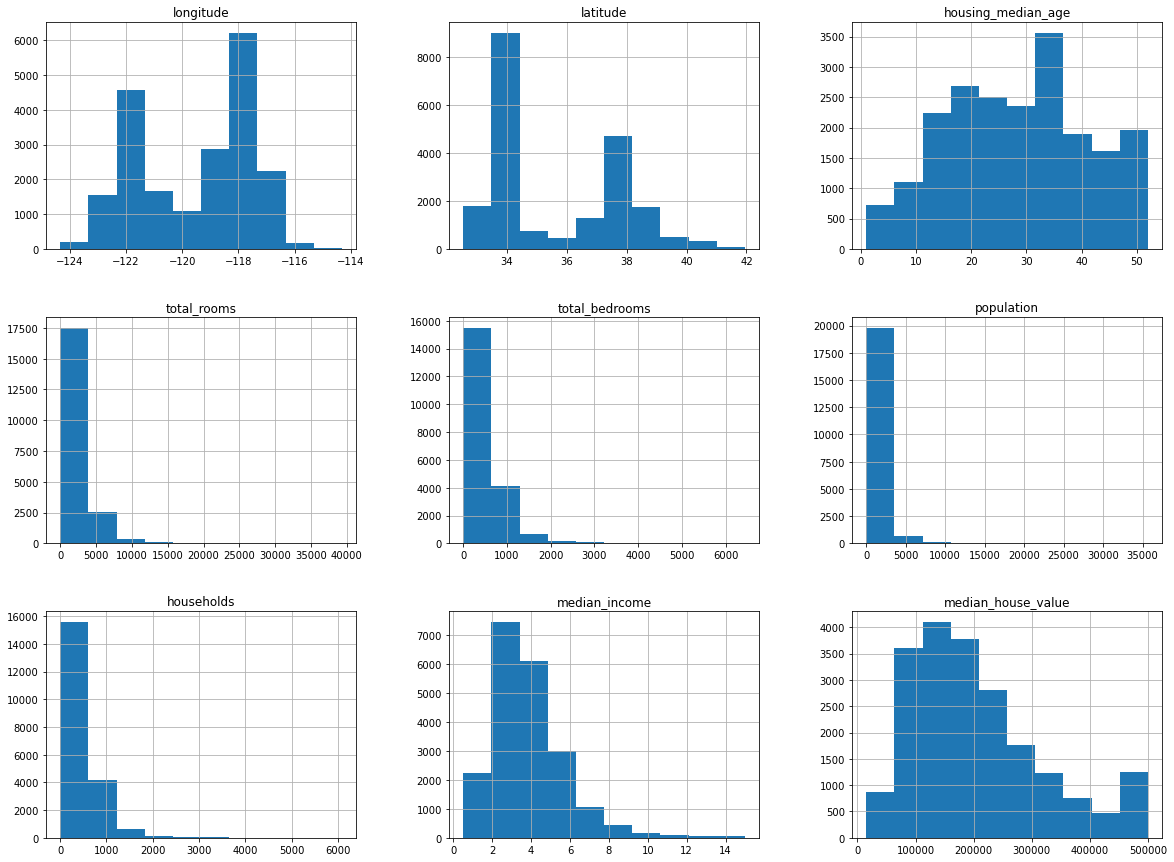

In [16]:
dataset.hist(figsize=(20,15))
# as you can see none of our figures has guaussian distibution.
# both median income and median house value has right skew
# total rooms, total bedrooms and households have exponential distribution
# Longitude and latitude have bbbimodal distribution

[Text(0, 0.5, 'median_house_value'),
 Text(0.5, 1.0, ' Boxplot of median_house_value')]

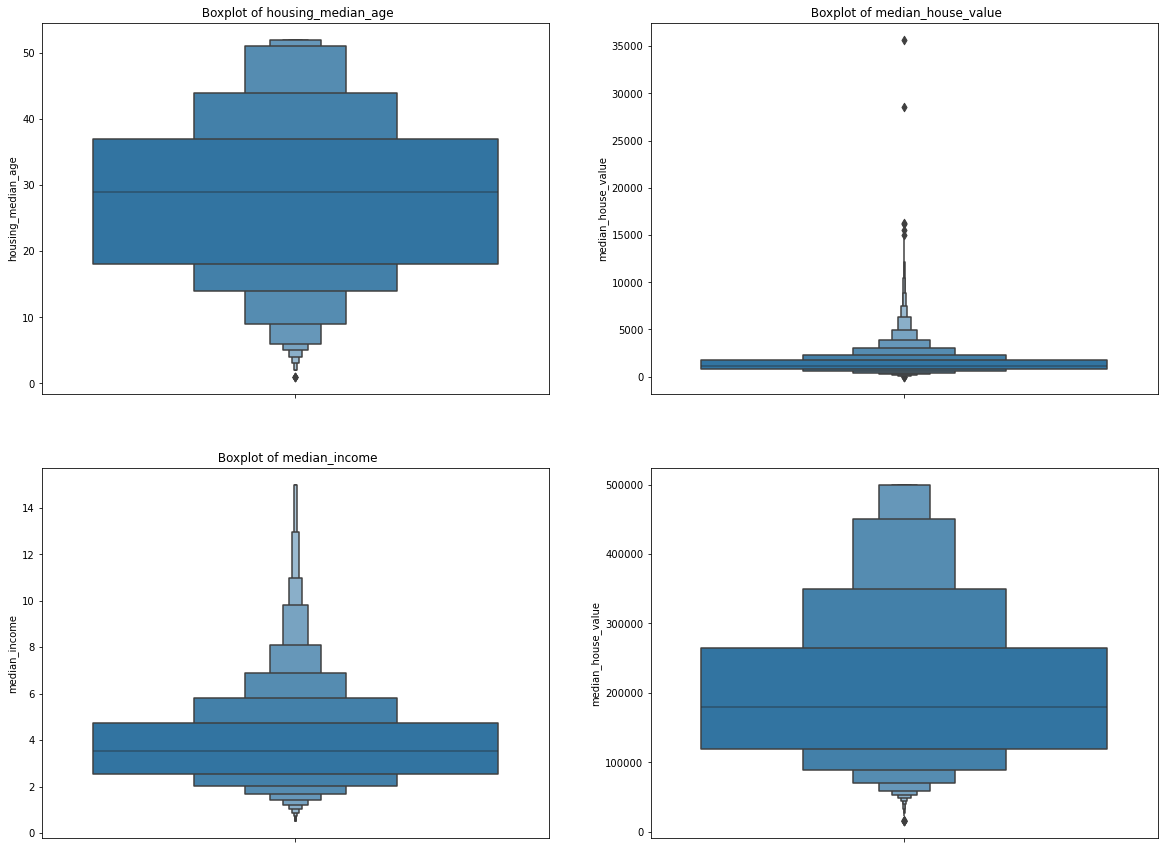

In [29]:
# you can see boxplot of four features
# the mean age of houses is near 30 years old
# we have some outliners in median_house_value
# the mean income of median income is 4 and most people get 3 to 4.5 median income

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(20,15))
sns.boxenplot(data=dataset, y='housing_median_age', orient='v', ax=axes[0][0])
sns.boxenplot(data=dataset, y='population', orient='v', ax=axes[0][1])
sns.boxenplot(data=dataset, y='median_income', orient='v', ax=axes[1][0])
sns.boxenplot(data=dataset, y='median_house_value', orient='v', ax=axes[1][1])

axes[0][0].set(ylabel='housing_median_age', title=' Boxplot of housing_median_age')
axes[0][1].set(ylabel='population', title=' Boxplot of population')
axes[1][0].set(ylabel='median_income', title=' Boxplot of median_income')
axes[0][1].set(ylabel='median_house_value', title=' Boxplot of median_house_value')

<AxesSubplot:>

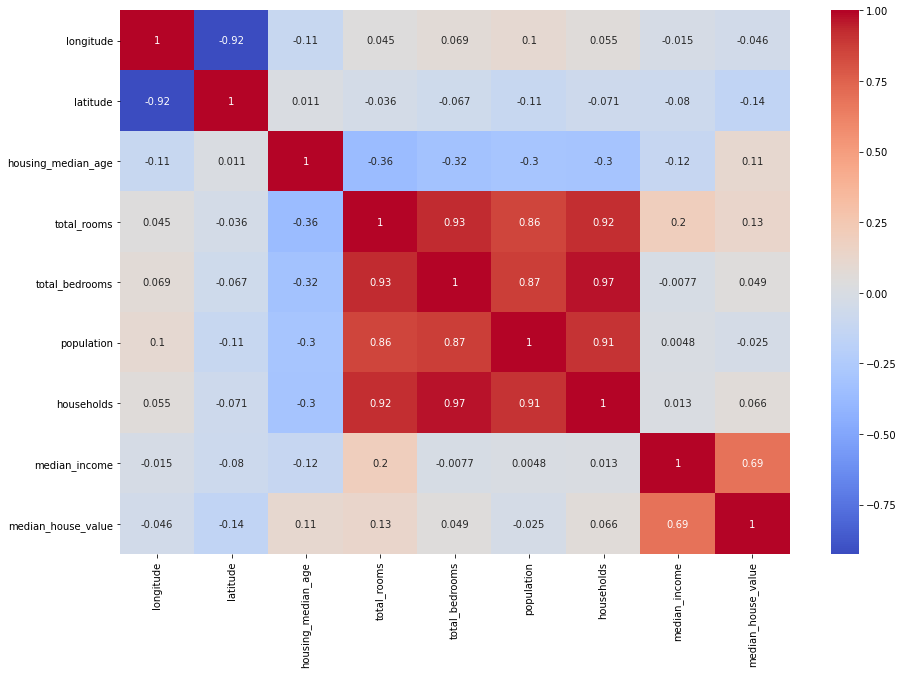

In [39]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(data= dataset.corr() , annot=True, cmap='coolwarm')
# As you see total rooms has strong positive correlation with total bedrooms
# population has strong positive correlation with housholds
# House median age has negative correlation with total rooms
#etc

Hypothesis testing

In [60]:
# Levene test to check equality of variance
#Note: new houses are considered below 25 years old

new_houses = dataset[dataset['housing_median_age'] < 25 ]['median_house_value']
old_houses = dataset[dataset['housing_median_age'] > 25 ]['median_house_value']
mystats, p = stats.levene(new_houses, old_houses, center='mean')
alpha = 0.05
if p > alpha:
    print('The two samples has equality of variance')
else:
    print('The two samples does not have equality of variance')

The two samples does not have equality of variance


In [56]:
# newer homes are expensive
# h0 = home age doesnt affect its price
# h1 = home age affects its price

mystats, p = stats.ttest_ind(new_houses, old_houses)
alpha = 0.05
if p>alpha:
    print('home age doesnt affect its price')
else:
    print('home age does affect its price')

home age does affect its price


In [58]:
# does ocean proximity affect home price?
# h0 = ocean proximity does not affect home price
# h1 = ocean proximity affects home price
inland = dataset[dataset['ocean_proximity']== 'INLAND'] ['median_house_value']
near_ocean = dataset[dataset['ocean_proximity']== 'NEAR OCEAN'] ['median_house_value']
near_bay = dataset[dataset['ocean_proximity']== 'NEAR BAY'] ['median_house_value']
island = dataset[dataset['ocean_proximity']== 'ISLAND'] ['median_house_value']
mystats, p = stats.f_oneway(inland, near_ocean, near_bay, island)
alpha = 0.05
if p > alpha:
    print('Ocean proximity does not affect home price')
else:
    print('Ocean proximity does affect home price')

Ocean proximity does affect home price


In [59]:
p

0.0

In [41]:
dataset.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [6]:
array = dataset.values
x = array[:,0:8]
y = array[:,8]

In [8]:
y

array([452600., 358500., 352100., ...,  92300.,  84700.,  89400.])

In [20]:
models = []
models.append(( ' LR ' , LinearRegression()))
models.append(( ' LASSO ' , Lasso()))
models.append(( ' EN ' , ElasticNet()))
models.append(( ' KNN ' , KNeighborsRegressor()))
models.append(( ' CART ' , DecisionTreeRegressor()))
models.append(( ' SVR ' , SVR()))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=5)
    cv_results = cross_val_score(model, x, y, cv=kfold, scoring='r2')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

 LR : 0.585053 (0.057878)
 LASSO : 0.585052 (0.057879)
 EN : 0.537394 (0.049517)
 KNN : 0.136346 (0.103746)
 CART : 0.197802 (0.214368)


KeyboardInterrupt: 

In [34]:
data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
1hocean                 uint8
inland                  uint8
island                  uint8
near_bay                uint8
near_ocean              uint8
median_house_value    float64
dtype: object

In [36]:
this = data['1hocean','inland', 'island','near_bay', 'near_ocean']
data['1hocean','inland', 'island','near_bay', 'near_ocean'].to_numeric(this)

KeyError: ('1hocean', 'inland', 'island', 'near_bay', 'near_ocean')